In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
datos = np.loadtxt('https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/EnergiaPotencialGas2D.txt')

In [9]:
tiempo = datos[:,0]
potencial = datos[:,1]
potencial_medio = potencial - np.mean(potencial)
media_potencial = np.mean(potencial_medio)

In [6]:
n = len(potencial_medio)

In [7]:
fpotencial = np.fft.fft(potencial_medio)
potFrecuencia = np.fft.fftfreq(n)


In [8]:
mask = fpotencial >0
fpotencial_ = fpotencial[mask]

XMag_ = np.abs(fpotencial) / n
XMag2_ = 2.0*XMag_[mask]

fmax = fpotencial_[np.argmax(XMag_)]
XMag2_[fpotencial_ != fmax] = 0

In [10]:
XMag_I = np.fft.ifft(XMag2_)
nxmagi = len(XMag_I)

XMag_II = XMag_I * nxmagi + media_potencial



In [11]:
T = np.linspace(min(tiempo),max(tiempo), len(XMag_II))

In [16]:
p = 1/fmax
print(p)

(3.1632727348293375e-05-2.11356167673904e-07j)


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


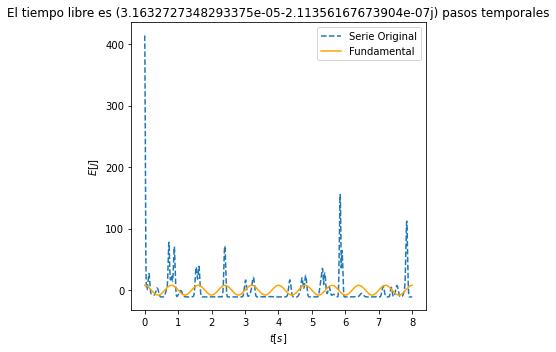

In [22]:
fig = plt.figure(figsize=(5,5))

plt.plot(tiempo,potencial_medio, label = 'Serie Original',ls= "--")
plt.plot(T ,XMag_II, label = 'Fundamental', c = 'orange')
plt.legend()
plt.title(f'El tiempo libre es {1/fmax} pasos temporales')
plt.xlabel('$t[s]$')
plt.ylabel('$E[j]$')
plt.tight_layout()
plt.show()